<a href="https://colab.research.google.com/github/sms25/Machine-Learning-Projects/blob/main/Housing_Price_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import dataset
df = pd.read_csv(r'/content/sample_data/california_housing_train.csv')

In [ ]:
#Show 1st 5 data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
#dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [40]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


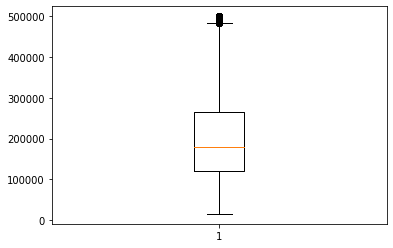

In [6]:
#Boxplot for median_house_value
plt.boxplot(df['median_house_value'])
plt.show()

In [7]:
#Find some statistical parameters
print("Maximum house value:",max(df['median_house_value']))
print("Minimum house value:",min(df['median_house_value']))
print("Standard deviation of house value:", df['median_house_value'].std(axis=0))
print("Variance of house value:", df['median_house_value'].var(axis=0))
print("Mean of house value:", df['median_house_value'].mean(axis=0))
print("Median of house value:", np.median(df['median_house_value']))
print("Skewness of house value:", df['median_house_value'].skew())
print("Kurtosis of house value:", df['median_house_value'].kurtosis())

Maximum house value: 500001.0
Minimum house value: 14999.0
Standard deviation of house value: 115983.76438720885
Variance of house value: 13452233601.427578
Mean of house value: 207300.91235294117
Median of house value: 180400.0
Skewness of house value: 0.9730366334725522
Kurtosis of house value: 0.3039975986141221


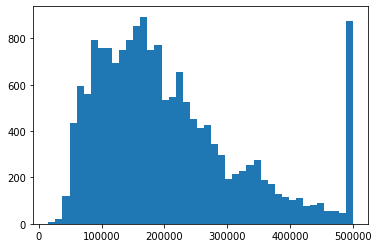

In [8]:
#Histogram for median house value
plt.hist(df['median_house_value'], bins='auto')
plt.show()

In [10]:
#Define input features
X = np.array(df.loc[:, df.columns !='median_house_value'])
X


array([[-114.31  ,   34.19  ,   15.    , ..., 1015.    ,  472.    ,
           1.4936],
       [-114.47  ,   34.4   ,   19.    , ..., 1129.    ,  463.    ,
           1.82  ],
       [-114.56  ,   33.69  ,   17.    , ...,  333.    ,  117.    ,
           1.6509],
       ...,
       [-124.3   ,   41.84  ,   17.    , ..., 1244.    ,  456.    ,
           3.0313],
       [-124.3   ,   41.8   ,   19.    , ..., 1298.    ,  478.    ,
           1.9797],
       [-124.35  ,   40.54  ,   52.    , ...,  806.    ,  270.    ,
           3.0147]])

In [11]:
#Define output feature
y = np.array(df['median_house_value'])
y

array([ 66900.,  80100.,  85700., ..., 103600.,  85800.,  94600.])

In [14]:
#Shape of X and y
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (17000, 8)
Shape of y: (17000,)


In [15]:
#Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=66)

In [16]:
#Shape of train and test data
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (15300, 8)
Shape of X_test: (1700, 8)
Shape of y_train: (15300,)
Shape of y_test: (1700,)


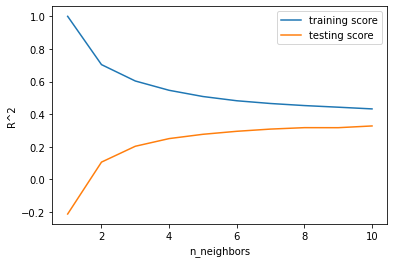

In [17]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

training_score = []
testing_score = []

neighbors_settings = range(1,11)

#Find the best n_neighbors value
for n_neighbors in neighbors_settings:
  knn = KNeighborsRegressor(n_neighbors = n_neighbors)
  knn.fit(X_train, y_train)
  training_score.append(knn.score(X_train, y_train))
  testing_score.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_score, label="training score")
plt.plot(neighbors_settings, testing_score, label='testing score')
plt.xlabel("n_neighbors")
plt.ylabel("R^2")
plt.legend()
plt.show()

In [18]:
knn_10 = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)

print("R^2 of KNN Regressor on training set: {:.3f}".format(knn_10.score(X_train, y_train)))
print("R^2 of KNN Regressor on testing set: {:.3f}".format(knn_10.score(X_test, y_test)))

R^2 of KNN Regressor on training set: 0.433
R^2 of KNN Regressor on testing set: 0.328


In [19]:
#Linear Regression
from sklearn.linear_model import LinearRegression

linReg = LinearRegression().fit(X_train, y_train)
print("R^2 of Linear Regressor on training set: {:.3f}".format(linReg.score(X_train, y_train)))
print("R^2 of Linear Regressor on testing set: {:.3f}".format(linReg.score(X_test, y_test)))

R^2 of Linear Regressor on training set: 0.640
R^2 of Linear Regressor on testing set: 0.652


In [20]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dTree = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)

print("R^2 of Decision Tree Regressor on training set: {:.3f}".format(dTree.score(X_train, y_train)))
print("R^2 of Decision Tree Regressor on testing set: {:.3f}".format(dTree.score(X_test, y_test)))

R^2 of Decision Tree Regressor on training set: 1.000
R^2 of Decision Tree Regressor on testing set: 0.664


In [21]:
dTree7 = DecisionTreeRegressor(max_depth=7, random_state=0).fit(X_train, y_train)

print("R^2 of Decision Tree Regressor on training set: {:.3f}".format(dTree7.score(X_train, y_train)))
print("R^2 of Decision Tree Regressor on testing set: {:.3f}".format(dTree7.score(X_test, y_test)))

R^2 of Decision Tree Regressor on training set: 0.699
R^2 of Decision Tree Regressor on testing set: 0.694


In [22]:
#Feature Importance
print("Feature importances:\n{}".format(dTree7.feature_importances_))

Feature importances:
[0.12062311 0.13358014 0.05592642 0.         0.00410157 0.0018717
 0.00383125 0.6800658 ]


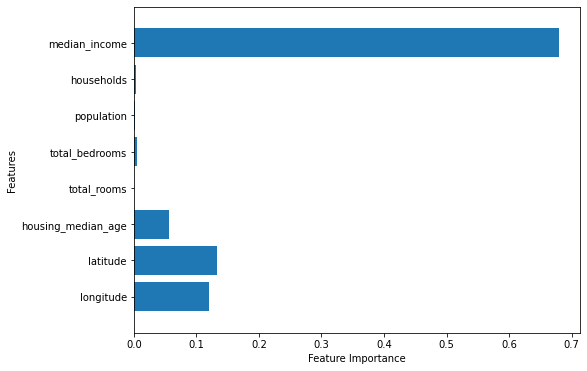

In [23]:
df_features = [x for i, x in enumerate(df.columns) if i!=8]
n_features = 8

def plot_feature_importance(model):
  plt.figure(figsize=(8,6))
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), df_features)
  plt.xlabel("Feature Importance")
  plt.ylabel("Features")
  plt.ylim(-1, n_features)
  plt.show()

plot_feature_importance(dTree7)

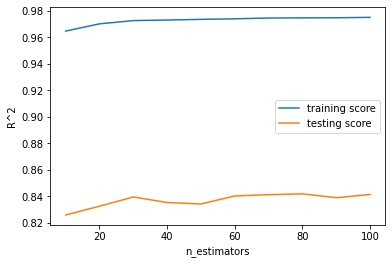

In [25]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

training_score = []
testing_score = []

estimators_settings = range(10,101,10)

#Find the best estimators value
for n_estimators in estimators_settings:
  rf = RandomForestRegressor(n_estimators = n_estimators).fit(X_train,y_train)
  training_score.append(rf.score(X_train, y_train))
  testing_score.append(rf.score(X_test, y_test))

plt.plot(estimators_settings, training_score, label="training score")
plt.plot(estimators_settings, testing_score, label='testing score')
plt.xlabel("n_estimators")
plt.ylabel("R^2")
plt.legend()
plt.show()

In [26]:
rf_100 = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
print("R^2 of Random Forest Regressor on training set: {:.3f}".format(rf_100.score(X_train, y_train)))
print("R^2 of Random Forest Regressor on training set: {:3f}".format(rf_100.score(X_test, y_test)))

R^2 of Random Forest Regressor on training set: 0.975
R^2 of Random Forest Regressor on training set: 0.840062


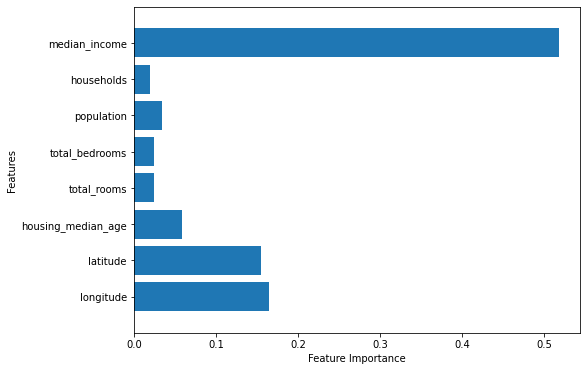

In [27]:
#Feature Importance for Random Forest
plot_feature_importance(rf_100)

In [28]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor().fit(X_train, y_train)
print("R^2 of Gradient Boosting Regressor on training set: {:.3f}".format(gb.score(X_train,y_train)))
print("R^2 of Gradient Boosting Regressor on testing set: {:.3f}".format(gb.score(X_test,y_test)))

R^2 of Gradient Boosting Regressor on training set: 0.793
R^2 of Gradient Boosting Regressor on testing set: 0.800


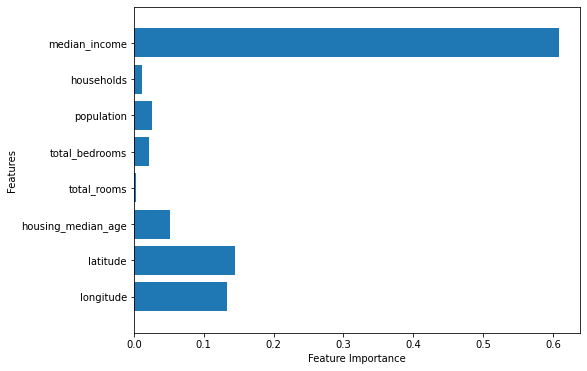

In [29]:
#Feature importance for Gradient Regression
plot_feature_importance(gb)

In [30]:
#Support Vector Regressor with linear kernel
from sklearn.svm import SVR

sv = SVR(kernel='linear').fit(X_train,y_train)
print("R^2 of Support Vector Regressor on training set: {:.3f}".format(sv.score(X_train,y_train)))
print("R^2 of Support Vector Regressor on testing set: {:.3f}".format(sv.score(X_test,y_test)))

R^2 of Support Vector Regressor on training set: 0.324
R^2 of Support Vector Regressor on testing set: 0.373


In [31]:
#Support Vector Regressor with rbf kernel
from sklearn.svm import SVR

sv_rbf = SVR(kernel='rbf').fit(X_train,y_train)
print("R^2 of Support Vector Regressor on training set: {:.3f}".format(sv_rbf.score(X_train,y_train)))
print("R^2 of Support Vector Regressor on testing set: {:.3f}".format(sv_rbf.score(X_test,y_test)))

R^2 of Support Vector Regressor on training set: -0.055
R^2 of Support Vector Regressor on testing set: -0.046


In [32]:
#Support Vector Regressor with poly kernel
from sklearn.svm import SVR

sv_poly = SVR(kernel='poly').fit(X_train,y_train)
print("R^2 of Support Vector Regressor on training set: {:.3f}".format(sv_poly.score(X_train,y_train)))
print("R^2 of Support Vector Regressor on testing set: {:.3f}".format(sv_poly.score(X_test,y_test)))

R^2 of Support Vector Regressor on training set: -0.053
R^2 of Support Vector Regressor on testing set: -0.042


In [33]:
#Deep Learning with MLPRegressor
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=42).fit(X_train,y_train)

print("R^2 of MLP Regressor on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("R^2 of MLP Regressor on testing set: {:.3f}".format(mlp.score(X_test, y_test)))

R^2 of MLP Regressor on training set: 0.307
R^2 of MLP Regressor on testing set: 0.342


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
#Tune the alpha and max_iter parameter
mlp1 = MLPRegressor(max_iter=1000, alpha=1, random_state=0).fit(X_train, y_train)

print("R^2 of MLP Regressor on training set: {:.3f}".format(mlp1.score(X_train, y_train)))
print("R^2 of MLP Regressor on test set: {:.3f}".format(mlp1.score(X_test, y_test)))

R^2 of MLP Regressor on training set: 0.642
R^2 of MLP Regressor on test set: 0.646


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


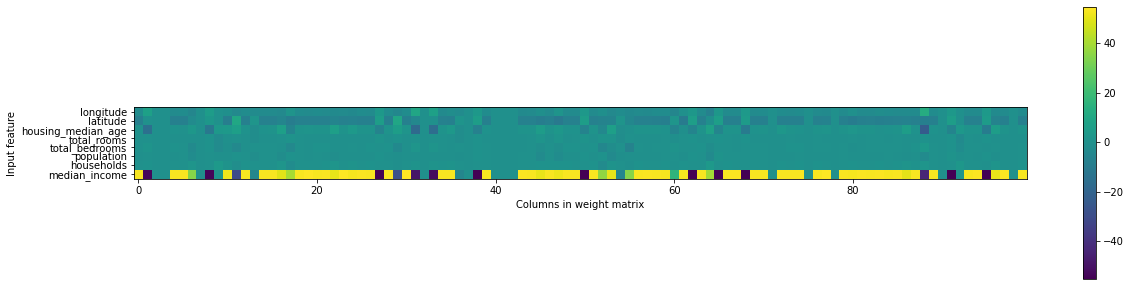

In [35]:
#Heat map of the 1st layer weight
plt.figure(figsize=(20,5))
plt.imshow(mlp1.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(np.arange(n_features), df_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()

In [36]:
#Comparison of models' performance
models = ['KNN Regressor', 'Linear Regression', 'Decision Tree Regressor' ,'Random Forest Regressor',
 'Gradient Boosting Regressor','Support Vector Regressor', 'MLPRegressor']

k = knn_10.score(X_test, y_test)
l = linReg.score(X_test, y_test)
d = dTree.score(X_test, y_test)
r = rf_100.score(X_test, y_test)
g = gb.score(X_test,y_test)
s = sv.score(X_test,y_test)
m = mlp1.score(X_test, y_test)

tests_score = [k, l, d, r, g, s, m]
compare_models = pd.DataFrame({ "Algorithm": models, "Test Score": tests_score })
compare_models.sort_values(by = "Test Score", ascending = False)

,Algorithm,Test Score
3,Random Forest Regressor,0.840062
4,Gradient Boosting Regressor,0.799897
2,Decision Tree Regressor,0.663965
1,Linear Regression,0.652235
6,MLPRegressor,0.646395
5,Support Vector Regressor,0.373215
0,KNN Regressor,0.328174


In [37]:
#Save the best model
import pickle
pickle.dump(rf_100, open('house_price_pred_model.p','wb'))

In [38]:
#Load the model
import pickle
model = pickle.load(open('/content/house_price_pred_model.p','rb'))

In [39]:
#Predict price
lo = float(input('Longitude: '))
la = float(input('Latitude: '))
m_g = float(input('Housing median age: '))
r = float(input('Total number of rooms: '))
b_r = float(input('Number of bedrooms: '))
p = float(input('Population: '))
h = float(input('Households: '))
m_i = float(input('Median income: '))

test_data = np.array([[lo, la, m_g, r, b_r, p, h, m_i]])
print('Predicted housing price:',*model.predict(test_data))

Longitude: -122.05
Latitude: 37.37
Housing median age: 27
Total number of rooms: 3885
Number of bedrooms: 661
Population: 1537
Households: 606
Median income: 6.6085
Predicted housing price: 402113.19
